In [1]:
import torch

checkpoint_path = '../results/morse_models/2024-08-08-17-12-39-533-mp_morse_clamp_rm_0.5/checkpoint_0/best_checkpoint.pt'
state_dict = torch.load(checkpoint_path, map_location='cpu')['state_dict']

In [2]:
state_dict.keys()

odict_keys(['rm.weight', 'alphas.weight', 'D.weight', 'base_atomic_energy.weight', 'distance_expansion.offset'])

In [3]:
rm = state_dict['rm.weight']
alpha = state_dict['alphas.weight']
D = state_dict['D.weight']

In [4]:
def morse_potential(D, alpha, rm, r):
    return D * (1 - torch.exp(-alpha * (r - rm))) ** 2 - D

In [5]:
import numpy as np

X = torch.arange(0.01, 4, 0.01)
Ys = [
    morse_potential(D[i], alpha[i], rm[i], X).cpu().numpy() for i in range(100)
]

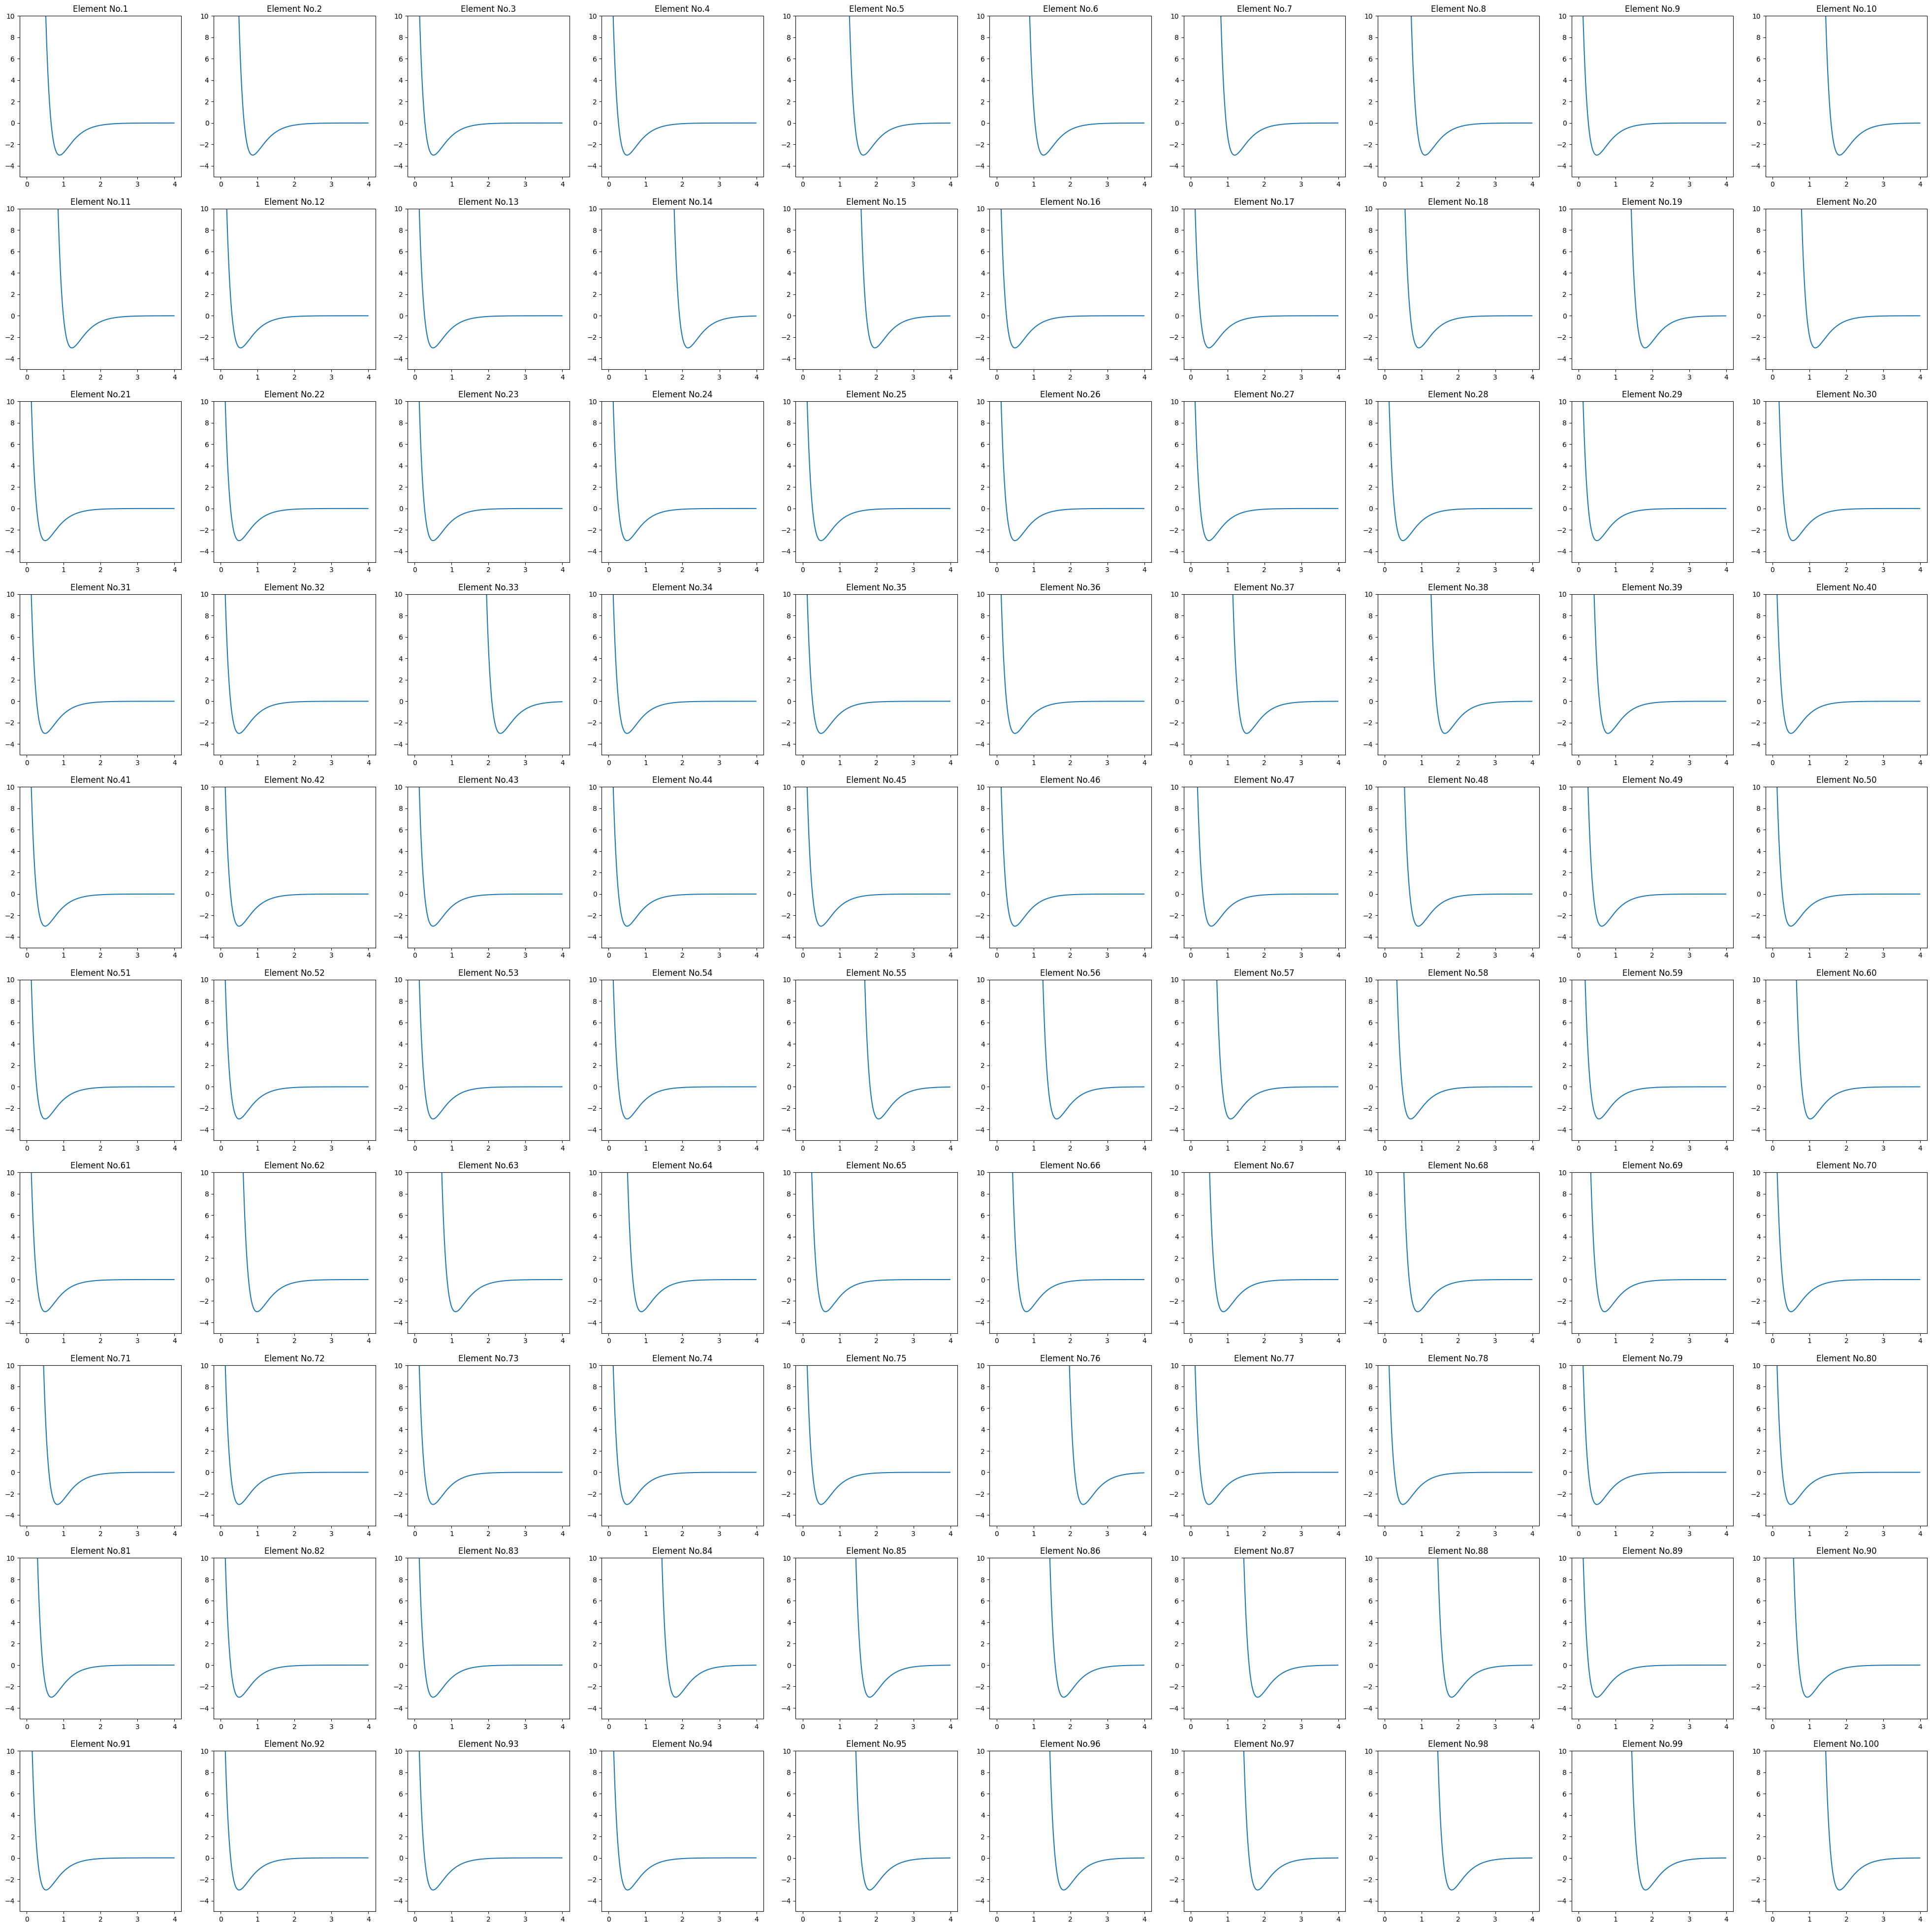

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(50, 50))

for i in range(10):
    for j in range(10):
        axes[i, j].plot(X, Ys[i * 10 + j])
        axes[i, j].set_ylim(top=10, bottom=-5)
        axes[i, j].set_title(f'Element No.{i * 10 + j + 1}')

plt.show()